In [50]:
import pandas as pd
import numpy as np

In [51]:
df_train = pd.read_csv("C:\\Users\\ninad\\Desktop\\BDSIN\\Final Project\\Data\\Taxi\\train.csv", parse_dates=['pickup_datetime','dropoff_datetime'])

In [52]:
df_train['pickup_hour'] = df_train['pickup_datetime'].dt.hour
df_train['pickup_minute'] = df_train['pickup_datetime'].dt.minute
df_train['pickup_second'] = df_train['pickup_datetime'].dt.second
df_train['pickup_day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['pickup_date'] = df_train['pickup_datetime'].dt.day
df_train['pickup_month'] = df_train['pickup_datetime'].dt.month
df_train['pickup_year'] = df_train['pickup_datetime'].dt.year

In [53]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_date,pickup_month,pickup_year
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,17,24,55,0,14,3,2016
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0,43,35,6,12,6,2016
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,11,35,24,1,19,1,2016
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,19,32,31,2,6,4,2016
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,13,30,55,5,26,3,2016


In [54]:
df_test = pd.read_csv("C:\\Users\\ninad\\Desktop\\BDSIN\\Final Project\\Data\\Taxi\\test.csv")
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,6/30/2016 23:59,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,6/30/2016 23:59,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,6/30/2016 23:59,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,6/30/2016 23:59,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,6/30/2016 23:59,1,-73.970215,40.761475,-73.961510,40.755890,N


In [55]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
vendor_id,1458644.0,1.534950,0.498777,1.000000,1.000000,2.000000,2.000000,2.000000e+00
passenger_count,1458644.0,1.664530,1.314242,0.000000,1.000000,1.000000,2.000000,9.000000e+00
pickup_longitude,1458644.0,-73.973486,0.070902,-121.933342,-73.991867,-73.981743,-73.967331,-6.133553e+01
pickup_latitude,1458644.0,40.750921,0.032881,34.359695,40.737347,40.754101,40.768360,5.188108e+01
dropoff_longitude,1458644.0,-73.973416,0.070643,-121.933304,-73.991325,-73.979752,-73.963013,-6.133553e+01
dropoff_latitude,1458644.0,40.751800,0.035891,32.181141,40.735885,40.754524,40.769810,4.392103e+01
trip_duration,1458644.0,959.492273,5237.431724,1.000000,397.000000,662.000000,1075.000000,3.526282e+06
pickup_hour,1458644.0,13.606484,6.399693,0.000000,9.000000,14.000000,19.000000,2.300000e+01
pickup_minute,1458644.0,29.590158,17.324714,0.000000,15.000000,30.000000,45.000000,5.900000e+01
pickup_second,1458644.0,29.473591,17.319852,0.000000,14.000000,29.000000,44.000000,5.900000e+01


In [56]:
print(df_train.shape)

(1458644, 18)


In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
pickup_hour           1458644 non-null int64
pickup_minute         1458644 non-null int64
pickup_second         1458644 non-null int64
pickup_day            1458644 non-null int64
pickup_date           1458644 non-null int64
pickup_month          1458644 non-null int64
pickup_year           1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(10),

<h6>Sanity check if there are any duplicate id's</h6>

In [58]:
print(df_train.id.duplicated().sum())

0


In [59]:
print(df_train.duplicated().sum())

0


<h6>Sanity check to cross check if all the trips are valid</h6>

In [60]:
sum(df_train.dropoff_datetime < df_train.pickup_datetime)

0

<h6>Getting to know about the data</h6>

In [61]:
#We will try and analyze the target variable that is trip duration
print("Longest Trip Duration in secs: {}".format(np.max(df_train['trip_duration'].values)))
print("Shortest Trip Duration in secs: {}".format(np.min(df_train['trip_duration'].values)))
print("Average Trip Duration in secs: {}".format(np.mean(df_train['trip_duration'].values)))

Longest Trip Duration in secs: 3526282
Shortest Trip Duration in secs: 1
Average Trip Duration in secs: 959.4922729603659


As we can observe that the smallest trip duration was of 1 seconds which is highly impossible and hence we will try and plot the outliers

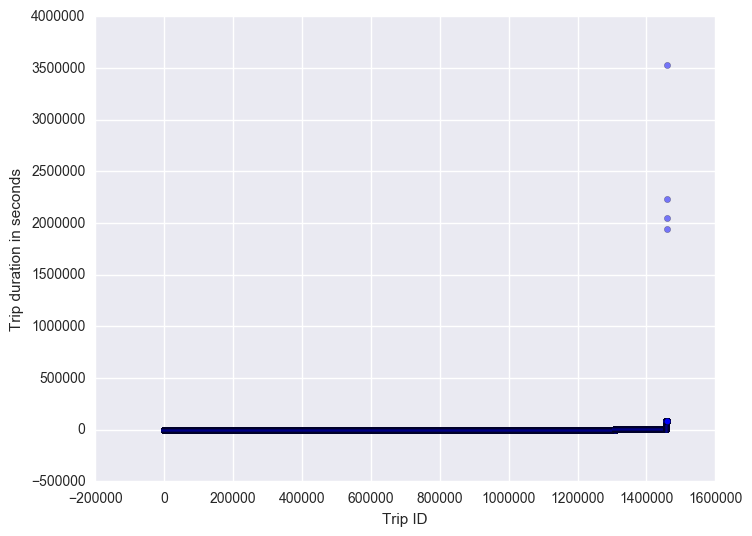

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(df_train['trip_duration'])), np.sort(df_train['trip_duration']), alpha=0.5)
plt.xlabel('Trip ID')
plt.ylabel('Trip duration in seconds')
plt.show()

From the above scatter plot we can see that there are 4 outliers in the target variable

In [62]:
# Getting to know about passengers column
print("Maximum number of passengers on a trip : ", np.max(df_train['passenger_count'].values))
print("Minimum number of passengers on a trip : ", np.min(df_train['passenger_count'].values))
print("Average number of passengers on a trip : ", np.mean(df_train['passenger_count'].values))
passenger_num = df_train['passenger_count'].value_counts()
print(passenger_num)

Maximum number of passengers on a trip :  9
Minimum number of passengers on a trip :  0
Average number of passengers on a trip :  1.66452952194
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


<h6>Checking for numm values in dataset</h6>

In [63]:
df_train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_hour           0
pickup_minute         0
pickup_second         0
pickup_day            0
pickup_date           0
pickup_month          0
pickup_year           0
dtype: int64

<b>We see that training data contains 14 columns and ~1.4 Million data records with No nulls are present in out dataset.</b>

In [69]:
#Count based on the day of the week
print(df_train['pickup_day'].value_counts())

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: pickup_day, dtype: int64


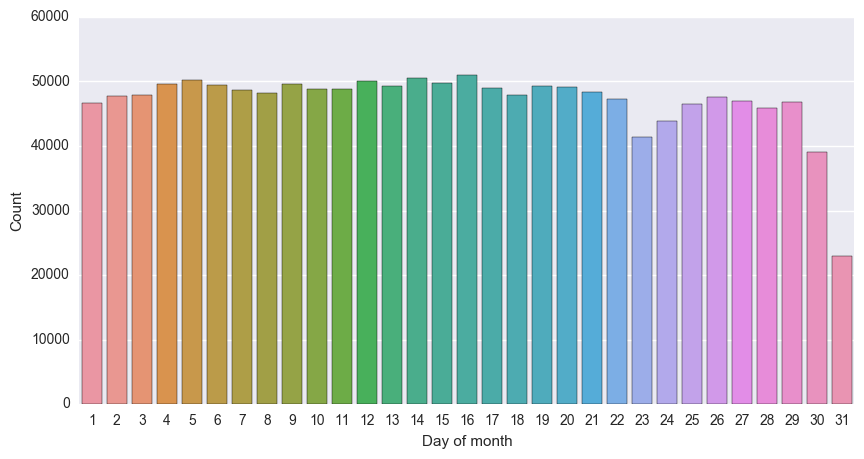

In [86]:
#Checking at what date of a month the number of trips are more
f = plt.figure(figsize=(10,5))
sns.countplot(x='pickup_date', data=df_train)
plt.xlabel('Day of month', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.show()

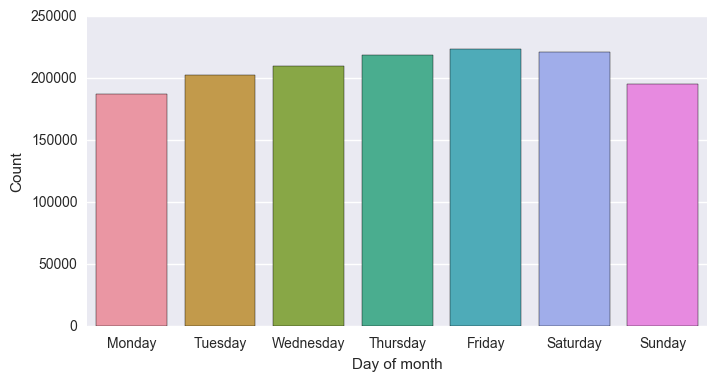

In [85]:
#Checking at what date of the week the number of trips are more
f = plt.figure(figsize=(8,4))
day_of_week = [i for i in range(7)]
sns.countplot(x='pickup_day', data=df_train)
plt.xlabel('Day of month', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(day_of_week, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

In [81]:
print(df_train['pickup_month'].value_counts())

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64


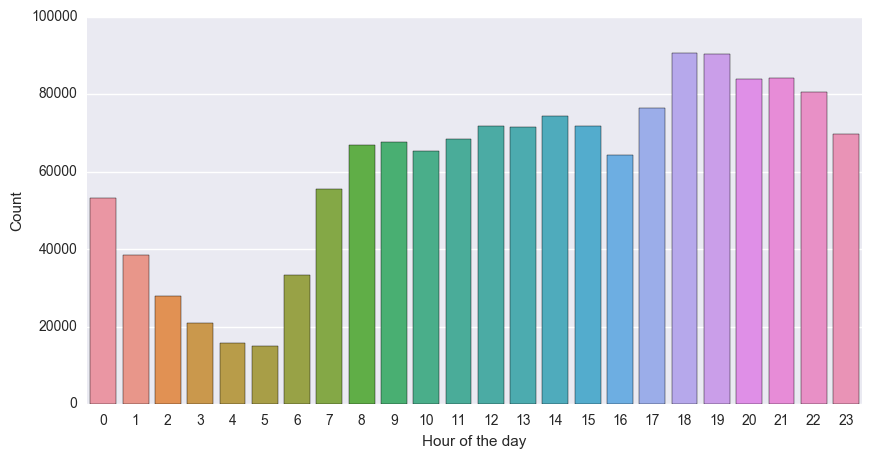

In [87]:
f = plt.figure(figsize=(10,5))
sns.countplot(x='pickup_hour', data=df_train)
plt.xlabel('Hour of the day', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.show()

It is evident from the above plot that number of trips spike after 6pm till midnight

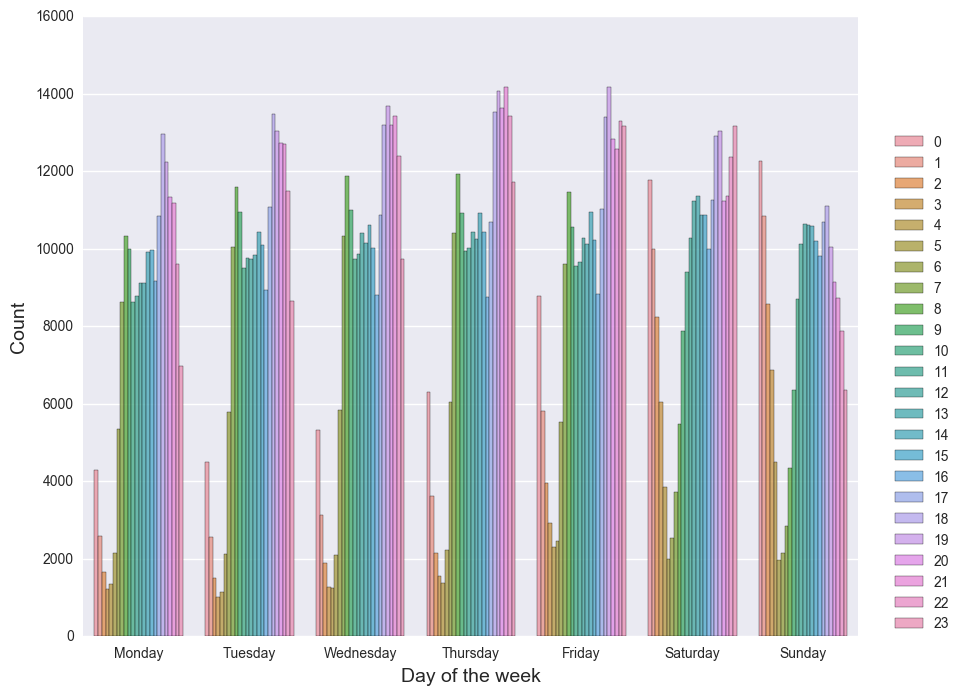

In [88]:
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='pickup_day', data=df_train, hue='pickup_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

<h3>Reading the external data</h3>

In [92]:
df_train_new = df_train.copy()
fast_route_1 = pd.read_csv("C:/Users/ninad/Desktop/BDSIN/Final Project/Data/OSRM/fastest_routes_train_part_1.csv")
fast_route_2 = pd.read_csv("C:/Users/ninad/Desktop/BDSIN/Final Project/Data/OSRM/fastest_routes_train_part_2.csv")
fast_route = pd.concat([fast_route_1,fast_route_2])
fast_route.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [93]:
print(fast_route.id.duplicated().sum())

0


In [95]:
fast_route_new = fast_route[['id','total_distance','total_travel_time','number_of_steps']]
fast_route_new.head()

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.1,164.9,5
1,id2377394,2513.2,332.0,6
2,id3504673,1779.4,235.8,4
3,id2181028,1614.9,140.1,5
4,id0801584,1393.5,189.4,5


In [96]:
train_df = pd.merge(df_train_new, fast_route_new, on='id', how='left')
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,pickup_minute,pickup_second,pickup_day,pickup_date,pickup_month,pickup_year,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,24,55,0,14,3,2016,2009.1,164.9,5.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,43,35,6,12,6,2016,2513.2,332.0,6.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,35,24,1,19,1,2016,11060.8,767.6,16.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,32,31,2,6,4,2016,1779.4,235.8,4.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,30,55,5,26,3,2016,1614.9,140.1,5.0


In [98]:
print(train_df.shape)

(1458644, 21)


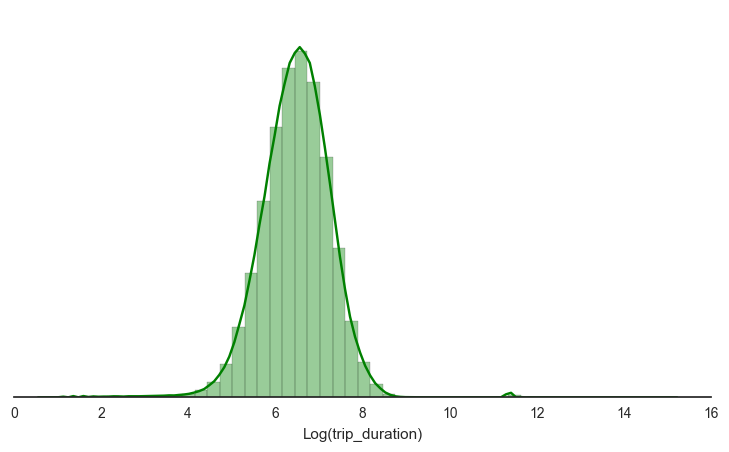

In [104]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")
f, axes = plt.subplots(1, 1, figsize=(9, 5), sharex=True)
sns.despine(left=True)
sns.distplot(np.log(train_df['trip_duration'].values+1), 
             axlabel = 'Log(trip_duration)', 
             label = 'log(trip_duration)', 
             bins = 50, 
             color="g")
plt.setp(axes, yticks=[])
plt.show()
